# Hints for Homework 1

## Problem 1

In [6]:
function my_log(N)
    denom = 1
    sum = 0
    for k in 1:N
        denom = denom*2
        sum = sum+1/k/denom
    end
    return sum
end

my_log (generic function with 1 method)

In [38]:
my_log(64)

Inf

The above behavior is different from what MATLAB would give you. The reason is that in Julia, exceeding the maximum representable value of a given type results in a wraparound behavior. 

In [39]:
typemax(Int64)

9223372036854775807

In [40]:
2^63

-9223372036854775808

In [41]:
-2^63 == ans

true

Therefore, $2^64$ is actually wrapped around to 0. That's why I get an `Inf` here. In MATLAB, exceeding results in a return of `Inf`, and consequently the result is not updated anymore once we have summed after the $64$-th term.

## Problem 2

In [64]:
function mybeta_naive(x, y)
    return gamma(x)*gamma(y)/gamma(x+y)
end

mybeta_naive (generic function with 1 method)

In [73]:
[gamma(100)^2, mybeta_naive(100,100)]

2-element Array{Float64,1}:
 Inf
 NaN

In [63]:
function mybeta_gammaln(x, y)
    # return B(x,y) = exp(lgamma(x)+lgamma(y)-lgamma(x+y))
    return exp(lgamma(x)+lgamma(y)-lgamma(x+y))
end

mybeta_gammaln (generic function with 1 method)

In [68]:
mybeta_gammaln(100,100)

2.2087606931999387e-61

The bad thing about the naive way is that $\Gamma(x)$ tends to return really large values, and when doing multiplication and division, errors can occur. The use of `lgamma` function managed to get rid of this and turns multiplication/division into addition/subtraction.

## Problem 3

In [24]:
function base_case_tan(x)
    # The function calculates tan(x) for small x using Taylor
    # expansion up to order 9 via Horn's method
    y = x*x
    return x*(1+y*(1/3+y*(2/15+y*(17/315+62/2835*y))))
end 

base_case_tan (generic function with 1 method)

In [55]:
function my_tan(x)
    # Calculate tan following the algorithm presented in
    # http://mathonweb.com/help_ebook/html/algorithms.htm#tan
    x = mod(x, 1.0*pi)
    invert_case = 0
    double_case = 0
    s = 1
    if x > pi/2
        x = pi-x
        s = -1
    end
    
    if x > pi/4
        x = pi/2 - x
        invert_case = 1
    end
    
    if x > pi/8
        x = x/2;
        double_case = 1;
    end
    
    temp = s*base_case_tan(x)
    # Note the order here! Double first, invert follows.    
    if double_case == 1
        temp = 2*temp/(1-temp*temp)
    end
    
    if invert_case == 1
        temp = 1/temp
    end
    
    return temp
end  

my_tan (generic function with 1 method)

In [56]:
tan(pi/2-0.01)

99.99666664444354

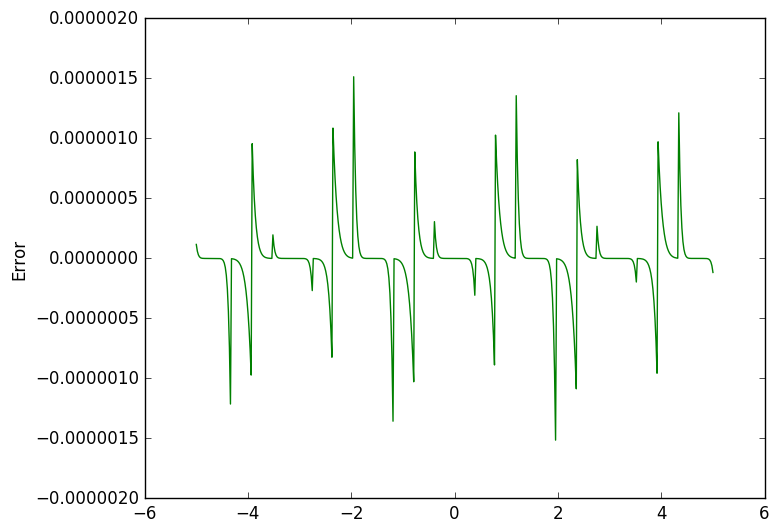

PyObject <matplotlib.text.Text object at 0x00000000210C0860>

In [62]:
using PyPlot
x = linspace(-5,5,500)
err = [my_tan(x[i]) - tan(x[i]) for i = 1:length(x)]
plot(x, err, color = "green")
ylabel("Error")